In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_boston

In [2]:
def read_dataset(filePath,delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)

def read_boston_data():
    boston = load_boston()
    features = np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples), features], [n_training_samples, n_dim + 1])
    l = np.reshape(labels, [n_training_samples, 1])
    return f, l

In [3]:
features,labels = read_boston_data()
normalized_features = feature_normalize(features)
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

In [4]:
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None, n_dim])
y = tf.placeholder(tf.float32,[None, 1])
theta = tf.Variable(tf.ones([n_dim, 1]))

y_pred = tf.matmul(X, theta)

mse = tf.reduce_mean(tf.square(y_pred - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
init = tf.global_variables_initializer()
feed = {X: train_x, y: train_y}

with tf.Session() as sess:
    sess.run(init)
    
    # training
    for epoch in range(training_epochs):
        sess.run(training_op, feed_dict=feed)
        cost_history = np.append(cost_history, sess.run(mse, feed_dict=feed))
    
    # testing
    pred_y = sess.run(y_pred, feed_dict={X: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    test_mse = mse.eval()

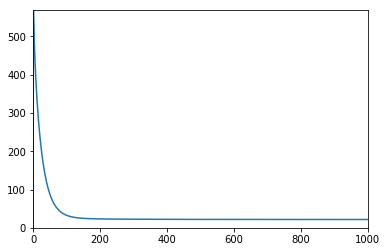

In [6]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

MSE: 24.0030


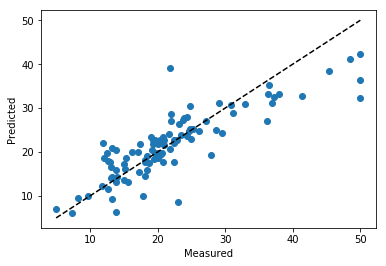

In [7]:
print("MSE: %.4f"%test_mse) 

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()